### Operating with vectors. Distances

- operating with vectors:
    - adition
    - subtraction
- distances
    - Euclidean (L2 norm)
    - Manhattan (L1 norm)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = sns.load_dataset('iris')

#### let's pick two datapoints from the iris dataset

In [3]:
iris.iloc[[15, 106]]

,sepal_length,sepal_width,petal_length,petal_width,species
15,5.7,4.4,1.5,0.4,setosa
106,4.9,2.5,4.5,1.7,virginica


#### these two datapoints are represented by two 4-dimensional vectors

In [4]:
U = iris.iloc[15, :-1].to_numpy(dtype = 'float')
V = iris.iloc[106, :-1].to_numpy(dtype = 'float')
np.array([U, V])

array([[5.7, 4.4, 1.5, 0.4],
       [4.9, 2.5, 4.5, 1.7]])

- we can also consider any lower dimensional vectors of these two datapoints, for instance considering only attributes sepal_length and petal_width (i.e. components 0 and 3)

In [5]:
components = [0, 3]
u = U[components]
v = V[components]
np.array([u, v])

array([[5.7, 0.4],
       [4.9, 1.7]])

### vector addition

- the addition of two vectors $\vec{u}$ and $\vec{v}$ is another vector with components given by the *component-wise* addition of $\vec{u}$ and $\vec{v}$

$$\vec{u} = (u_1, u_2),\\ \vec{v} = (v_1, v_2),\\ \vec{u} - \vec{v} = (u_1 + v_1, u_2 + v_2)$$

In [6]:
a = u +v
a

array([10.6,  2.1])

In [7]:
ma = np.round(np.vstack((u, v, a)), 1)
ma

array([[ 5.7,  0.4],
       [ 4.9,  1.7],
       [10.6,  2.1]])

In [8]:
# with all 4 components
np.round(np.vstack((U, V, U +V)), 1)

array([[ 5.7,  4.4,  1.5,  0.4],
       [ 4.9,  2.5,  4.5,  1.7],
       [10.6,  6.9,  6. ,  2.1]])

##### visualization of the vector addition

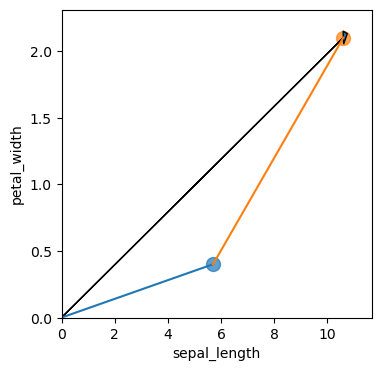

In [9]:
fig = plt.figure(figsize = (4, 4))
axs = fig.add_subplot()
# control axes
axs.set_xlim(0, ma[:, 0].max() *1.1)
axs.set_ylim(0, ma[:, 1].max() *1.1)
axs.set_xlabel('sepal_length')
axs.set_ylabel('petal_width')
# plot u
axs.plot([0, u[0]], [0, u[1]])
axs.scatter(u[0], u[1], marker = 'o', s = 100, alpha = 0.7)
# plot v starting from head of u
axs.plot([u[0], (u[0] +v[0])], [u[1], u[1] +v[1]])
axs.scatter((u[0] +v[0]), (u[1] +v[1]), marker = 'o', s = 100, alpha = 0.7)
# plot a = u +v
axs.arrow(0, 0, a[0], a[1], head_width = 0.1);

### vector subtraction

- the subtraction of two vectors $\vec{u}$ and $\vec{v}$ is another vector with components given by the *component-wise* subtraction of $\vec{u}$ and $\vec{v}$

$$\vec{u} = (u_1, u_2),\\ \vec{v} = (v_1, v_2),\\ \vec{u} - \vec{v} = (u_1 - v_1, u_2 - v_2)$$

In [10]:
b = u -v
b

array([ 0.8, -1.3])

In [11]:
mb = np.round(np.vstack((u, v, b)), 1)
mb

array([[ 5.7,  0.4],
       [ 4.9,  1.7],
       [ 0.8, -1.3]])

In [12]:
# with all 4 components
np.round(np.vstack((U, V, U -V)), 1)

array([[ 5.7,  4.4,  1.5,  0.4],
       [ 4.9,  2.5,  4.5,  1.7],
       [ 0.8,  1.9, -3. , -1.3]])

##### visualization of the vector subtraction

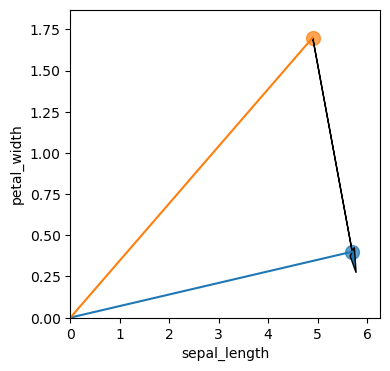

In [13]:
fig = plt.figure(figsize = (4, 4))
axs = fig.add_subplot()
# control axes
axs.set_xlim(0, mb[:, 0].max() *1.1)
axs.set_ylim(0, mb[:, 1].max() *1.1)
axs.set_xlabel('sepal_length')
axs.set_ylabel('petal_width')
# plot u
axs.plot([0, u[0]], [0, u[1]])
axs.scatter(u[0], u[1], marker = 'o', s = 100, alpha = 0.7)
# plot v
axs.plot([0, v[0]], [0, v[1]])
axs.scatter(v[0], v[1], marker = 'o', s = 100, alpha = 0.7)
# plot b = u -v from head of v
axs.arrow(v[0], v[1], b[0], b[1], head_width = 0.1);

### Euclidean distance (L2 norm)

- the Euclidean distance between $\vec{u}$ and $\vec{v}$ is the ***L2 norm*** of the difference vector $\vec{u} -\vec{v}$

$$\forall \vec{u}, \vec{v} \in \mathcal{R}^m,\quad d\left(u, v\right) = ||\vec{u} -\vec{v}|| = \left(\sum_{j=1}^m \left(u_j - v_j\right)^2\right)^{1/2}$$

- consequently,

$$d\left(u, v\right) = d\left(v, u\right)$$

In [14]:
b = u -v
d_uv = np.sqrt(np.sum(b**2))
d_uv

1.5264337522473745

In [15]:
d_vu = np.sqrt(np.sum((v -u)**2))
d_vu

1.5264337522473745

In [16]:
# with all 4 components
np.sqrt(np.sum((U -V)**2)), np.sqrt(np.sum((V -U)**2))

(3.8652296180175374, 3.8652296180175374)

### Manhattan distance (L1 norm)

- the Manhattan distance between $\vec{u}$ and $\vec{v}$ is the ***L1 norm*** of the difference vector $\vec{u} -\vec{v}$

$$\forall \vec{u}, \vec{v} \in \mathcal{R}^m,\quad d_m\left(u, v\right) = |\vec{u} -\vec{v}| = \sum_{j=1}^m |u_j - v_j|$$

- consequently,

$$d_m\left(u, v\right) = d_m\left(v, u\right)$$

In [17]:
d_uv = np.sum(np.abs(u -v))
d_uv

2.0999999999999996

In [18]:
d_vu = np.sum(np.abs(v -u))
d_vu

2.0999999999999996

In [19]:
# with all 4 components
np.sum(np.abs(U -V)), np.sum(np.abs(V -U))

(7.0, 7.0)